In [1]:
# Run magic commands first

%load_ext autoreload
%autoreload 2
%cd ..

/Users/kevinvu/Root/Projects/housing-nyc


In [2]:
from geopandas import read_file
import osmnx as ox

# Goal: Write gpkg to graph

In [ ]:
path = 'Root/Projects/housing-nyc/notebooks/data/nycwalk.gpkg'
nodes = read_file(path, layer='nodes')
edges = read_file(path, layer='edges')

Took about 5 mins

In [ ]:
display(nodes.head())
edges.head()

,osmid,y,x,street_count,highway,ref,geometry
0,30807307,40.792134,-73.962183,2,None,None,POINT (-73.96218 40.79213)
1,30807308,40.792024,-73.962176,2,None,None,POINT (-73.96218 40.79202)
2,30807309,40.791687,-73.962407,2,None,None,POINT (-73.96241 40.79169)
3,30807310,40.791550,-73.962498,2,None,None,POINT (-73.96250 40.79155)
4,30807311,40.791256,-73.962752,2,None,None,POINT (-73.96275 40.79126)


,u,v,key,osmid,highway,oneway,reversed,length,name,maxspeed,...,ref,service,access,width,bridge,junction,tunnel,est_width,area,geometry
0,30807307,4276626653,0,46613689,bridleway,False,False,11.984,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (-73.96218 40.79213, -73.96224 40.7..."
1,30807307,4276627019,0,46613689,bridleway,False,True,12.302,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (-73.96218 40.79213, -73.96213 40.7..."
2,30807308,4276626644,0,332080802,footway,False,False,5.349,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (-73.96218 40.79202, -73.96218 40.7..."
3,30807308,1203806398,0,428576367,footway,False,False,5.894,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (-73.96218 40.79202, -73.96216 40.7..."
4,30807309,30807310,0,46613689,bridleway,False,False,17.034,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (-73.96241 40.79169, -73.96250 40.7..."


In [16]:
path = 'Root/Projects/housing-nyc/notebooks/data/nycwalk.gpkg'
nodes = read_file(path, layer='nodes').set_index('osmid')
edges = read_file(path, layer='edges').set_index(['u', 'v', 'key'])
display(nodes.head())
edges.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
30807307,40.792134,-73.962183,2,None,None,POINT (-73.96218 40.79213)
30807308,40.792024,-73.962176,2,None,None,POINT (-73.96218 40.79202)
30807309,40.791687,-73.962407,2,None,None,POINT (-73.96241 40.79169)
30807310,40.791550,-73.962498,2,None,None,POINT (-73.96250 40.79155)
30807311,40.791256,-73.962752,2,None,None,POINT (-73.96275 40.79126)


osmid    highway  oneway  reversed  length  name  \
u        v          key                                                         
30807307 4276626653 0     46613689  bridleway   False     False  11.984  None   
         4276627019 0     46613689  bridleway   False      True  12.302  None   
30807308 4276626644 0    332080802    footway   False     False   5.349  None   
         1203806398 0    428576367    footway   False     False   5.894  None   
30807309 30807310   0     46613689  bridleway   False     False  17.034  None   

                        maxspeed lanes   ref service access width bridge  \
u        v          key                                                    
30807307 4276626653 0       None  None  None    None   None  None   None   
         4276627019 0       None  None  None    None   None  None   None   
30807308 4276626644 0       None  None  None    None   None  None   None   
         1203806398 0       None  None  None    None   None  None   None   
30807309 30807310   0       None  None  None    None   None  None   None   

                        junction tunnel est_width  area  \
u        v          key                                   
30807307 4276626653 0       None   None      None  None   
         4276627019 0       None   None      None  None   
30807308 4276626644 0       None   None      None  None   
         1203806398 0       None   None      None  None   
30807309 30807310   0       None   None      None  None   

                                                                  geometry  
u        v          key                                                     
30807307 4276626653 0    LINESTRING (-73.96218 40.79213, -73.96224 40.7...  
         4276627019 0    LINESTRING (-73.96218 40.79213, -73.96213 40.7...  
30807308 4276626644 0    LINESTRING (-73.96218 40.79202, -73.96218 40.7...  
         1203806398 0    LINESTRING (-73.96218 40.79202, -73.96216 40.7...  
30807309 30807310   0    LINESTRING (-73.96241 40.79169, -73.96250 40.7...

took about 5 mins also

In [ ]:
G = ox.graph_from_gdfs(nodes, edges)

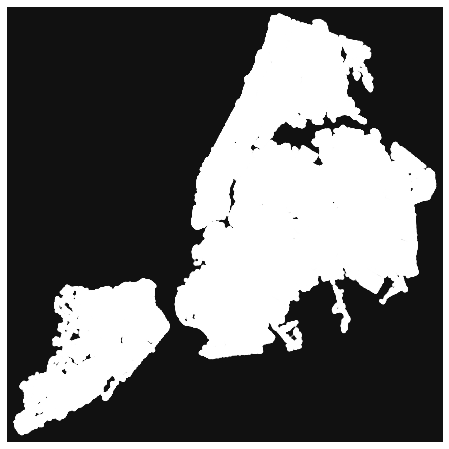

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [ ]:
G_plot = ox.project_graph(G)
ox.plot_graph(G_plot)